<a href="https://colab.research.google.com/github/Mratashnejad/Car-Detection-By-Brand-using-CNN/blob/main/CarDetectionUsingAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mratashnejad/Car-Detection-By-Brand-using-CNN/

Cloning into 'Car-Detection-By-Brand-using-CNN'...
remote: Enumerating objects: 11688, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 11688 (delta 5), reused 1 (delta 1), pack-reused 11673
Receiving objects: 100% (11688/11688), 1.60 GiB | 22.95 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Updating files: 100% (30805/30805), done.


**DANGER** : Removing extra files from the Dataset if they are not nessesary 


```
from google.colab import files
!rm -rf Car-Detection-By-Brand-using-CNN/Data/Test
!rm -rf Car-Detection-By-Brand-using-CNN/Data/Train
!rm -rf Car-Detection-By-Brand-using-CNN/Data/test
```



In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Car-Detection-By-Brand-using-CNN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/777e7afb-536d-47e1-85e8-2dbc9c925499.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/993e123e-8288-41f3-bb64-1f19f35794f8.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/6833b680-884b-4c7f-aa6a-d1394b364311.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/913a6284-709e-403c-bde5-707ea3edf81f.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/b6a13e3e-fe35-4d86-be5c-8bd3ae3c8768.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/07725ed0-f531-42bc-b898-0371c36288ef.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/f2c37439-8f3e-41de-81d6-7b375b31075a.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/bfd5c66b-976a-4907-8dd3-e442861b315f.jpg
/content/Car-Detection-By-Brand-using-CNN/Data/ClearData/Lexus/1f1c05c8-7b76-4799-a07d-2eb2b6050a96.jpg
/content/Car-

In [16]:
import os
import random
import shutil

#set the path to data set directory

dataset_path = '/content/Car-Detection-By-Brand-using-CNN/Data/ClearData'


#set path fot training directory
train_path   =  '/content/Car-Detection-By-Brand-using-CNN/Data/train'

#set path for testing directory
test_path    =  '/content/Car-Detection-By-Brand-using-CNN/Data/test'

#set the split ratio
split_ratio = 0.8

#repating over subdirectories in the dataset directory

for sub_dir in os.listdir(dataset_path):
    sub_dir_path = os.path.join(dataset_path , sub_dir)
    
    if os.path.isdir(sub_dir_path):
        #create the traing and testing subdirectories
        
        train_sub_dir_path = os.path.join(train_path,sub_dir)
        test_sub_dir_path = os.path.join(test_path,sub_dir)
        os.makedirs(train_sub_dir_path , exist_ok = True)
        os.makedirs(test_sub_dir_path , exist_ok = True)
        
        #get the list of image files in the subdireotries
        
        image_files = [f for f in os.listdir(sub_dir_path) if f.endswith('.jpg') or f.endswith('.png') or f.endswith('.jpeg') or f.endswith('.svg')]
        
        #suffle random
        random.shuffle(image_files)
        
        #spliting images
        
        split_index = int(len(image_files) * split_ratio)
        train_files = image_files[:split_index]
        test_files  = image_files[split_index:]
        
        
        #copy traning files to the traingin subdirecotry
        
        for file_name in train_files:
            src_path = os.path.join(sub_dir_path,file_name)
            dst_path = os.path.join(train_sub_dir_path , file_name)
            shutil.copy(src_path,dst_path)
            
        #copy testing files to testing subdirectory
        
        for file_name in test_files:
            src_path = os.path.join(sub_dir_path , file_name)
            dst_path = os.path.join(test_sub_dir_path , file_name)
            shutil.copy(src_path,dst_path)
            
print("Dataset Split into training and testing sets.")

Dataset Split into training and testing sets.


In [17]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


#set path to  training and testing directories

train_dir = '/content/Car-Detection-By-Brand-using-CNN/Data/train'
os.makedirs(train_dir, exist_ok = True)
test_dir  = '/content/Car-Detection-By-Brand-using-CNN/Data/test'
os.makedirs(test_dir , exist_ok = True)

#set the image size

img_size = (224,244)

#set the batch size

batch_size = 32

#set the number of epochs

epochs = 2

#set the learning rate
learning_rate = 0.001

#create ImageDataGenerator to preProccess the data

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

#Load the training data and split it into training and validation sets

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size , batch_size = batch_size , class_mode = 'categorical')
val_data   = test_datagen.flow_from_directory(test_dir , target_size= img_size , batch_size = batch_size , class_mode = 'categorical')


#Define the model architecture CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3) , activation='relu' , input_shape=(img_size[0] , img_size[1] , 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) , activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])

#compile model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

#train the model
model.fit(train_data , epochs=epochs , validation_data=val_data)



Found 9222 images belonging to 21 classes.
Found 2321 images belonging to 21 classes.
Epoch 1/2
289/289 [==============================] - 1634s 6s/step - loss: 2.9892 - accuracy: 0.0699 - val_loss: 2.8690 - val_accuracy: 0.1112
Epoch 2/2
289/289 [==============================] - 1580s 5s/step - loss: 2.7777 - accuracy: 0.1417 - val_loss: 2.7210 - val_accuracy: 0.1775


NameError: ignored

In [21]:
score = model.evaluate(val_data)
#evaluate the model on the validation set
print(f"Validation set accuracy: {score[1]*100:.2f}%")

#save model

model.save('/content/Car-Detection-By-Brand-using-CNN/car_model_classifier.h5')

73/73 [==============================] - 106s 1s/step - loss: 2.7210 - accuracy: 0.1775
Validation set accuracy: 17.75%


In [22]:
model = tf.keras.models.load_model('car_model_classifier.h5')

In [23]:
test_dir = '/content/Car-Detection-By-Brand-using-CNN/Data/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')


Found 2321 images belonging to 21 classes.


In [24]:
y_pred = model.predict(test_data)


73/73 [==============================] - 109s 1s/step


In [27]:
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)


In [28]:
from sklearn.metrics import accuracy_score
y_true_classes = test_data.classes
acc = accuracy_score(y_true_classes, y_pred_classes)
print(f"Test set accuracy: {acc*100:.2f}%")


Test set accuracy: 6.07%


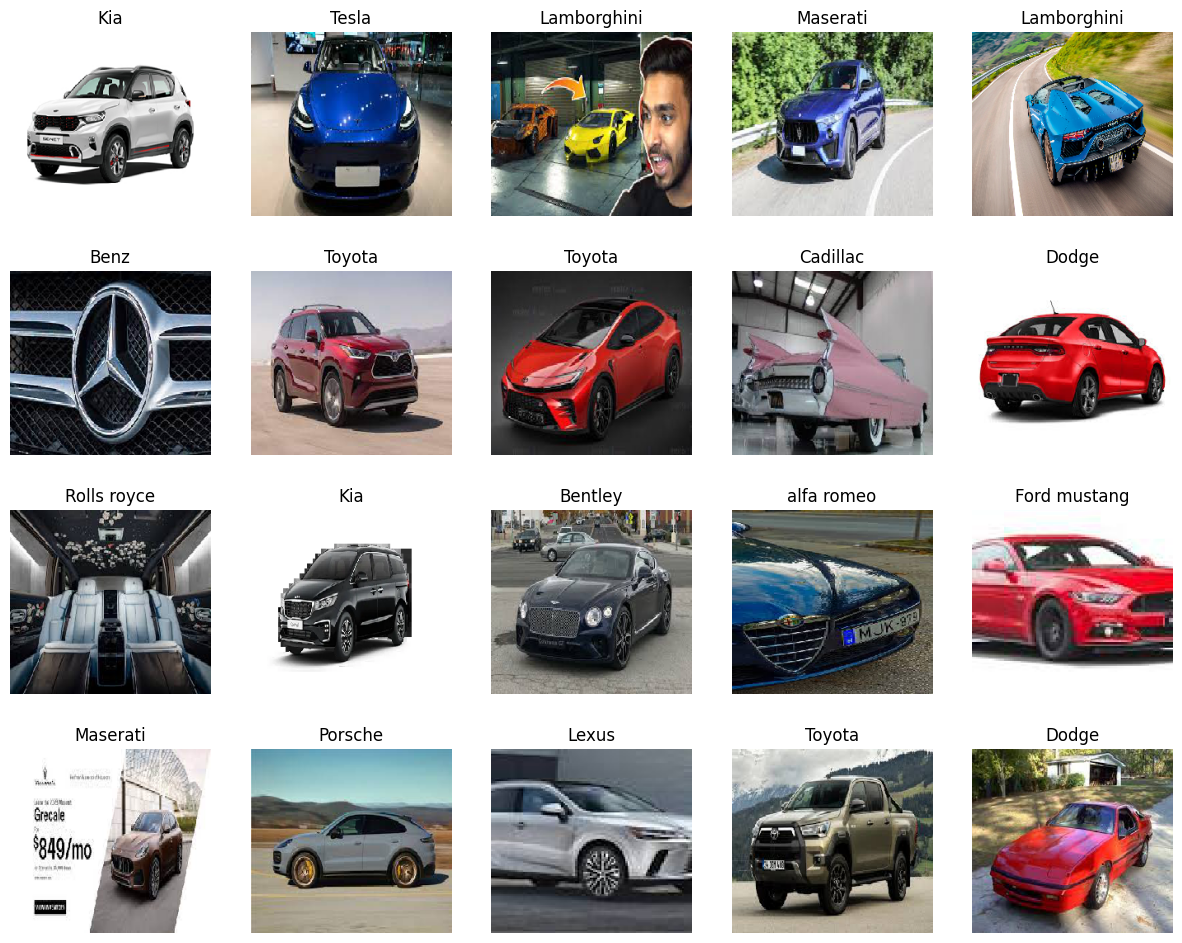

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# plot some car images from the validation set
class_names = list(train_data.class_indices.keys())
images, labels = next(val_data)

plt.figure(figsize=(15,15))
for i in range(20):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")



In [47]:
plt.figure()
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


KeyError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# get the true class labels for the test data
test_labels = test_data.classes

# get the predicted probabilities for each class
pred_probs = model.predict(test_data)

# get the predicted class labels
pred_classes = np.argmax(pred_probs, axis=1)

# get the names of the classes
class_names = list(test_data.class_indices.keys())

# plot a random selection of images with their true and predicted class labels
num_images = 9
rand_idx = np.random.choice(len(test_labels), size=num_images, replace=False)

plt.figure(figsize=(12, 8))
for i, idx in enumerate(rand_idx):
    plt.subplot(3, 3, i+1)
    plt.imshow(test_data[idx][0])
    true_label = class_names[test_labels[idx]]
    pred_label = class_names[pred_classes[idx]]
    plt.title(f"True: {true_label}\nPredicted: {pred_label}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()